<a href="https://colab.research.google.com/github/Parkshinhyang/Programmers/blob/main/%EB%92%A4%EC%97%90_%EC%9E%88%EB%8A%94_%ED%81%B0_%EC%88%98_%EC%B0%BE%EA%B8%B0(Lv_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 - 뒤에 있는 큰 수 찾기
https://school.programmers.co.kr/learn/courses/30/lessons/154539

## 문제 설명

정수로 이루어진 배열 numbers가 있습니다. 배열 의 각 원소들에 대해 자신보다 뒤에 있는 숫자 중에서 자신보다 크면서 가장 가까이 있는 수를 뒷 큰수라고 합니다.
정수 배열 numbers가 매개변수로 주어질 때, 모든 원소에 대한 뒷 큰수들을 차례로 담은 배열을 return 하도록 solution 함수를 완성해주세요. 단, 뒷 큰수가 존재하지 않는 원소는 -1을 담습니다.

## 제한사항

- 4 ≤ numbers의 길이 ≤ 1,000,000
    - 1 ≤ numbers[i] ≤ 1,000,000

## 입출력 예

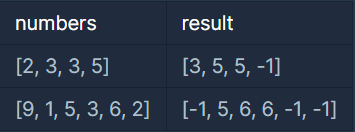

## 입출력 예 설명

### 입출력 예 #1

2의 뒷 큰수는 3입니다. 첫 번째 3의 뒷 큰수는 5입니다. 두 번째 3 또한 마찬가지입니다. 5는 뒷 큰수가 없으므로 -1입니다. 위 수들을 차례대로 배열에 담으면 [3, 5, 5, -1]이 됩니다.

### 입출력 예 #2

9는 뒷 큰수가 없으므로 -1입니다. 1의 뒷 큰수는 5이며, 5와 3의 뒷 큰수는 6입니다. 6과 2는 뒷 큰수가 없으므로 -1입니다. 위 수들을 차례대로 배열에 담으면 [-1, 5, 6, 6, -1, -1]이 됩니다.

## 첫 번째 방법

1. numbers의 크기만큼 반복해 arr에 각 원소보다 뒤에 있는 값을 원소로 하는 배열을 저장.
2. arr의 크기만큼 반복해 numbers[i]와 arr[j]를 비교하여 answer에 arr[j]를 또는 -1을 append후 answer을 return.

결과 : 실패

-> 시간초과



In [ ]:
def solution(numbers):
    answer = []
    arr = []
    for i in range(len(numbers) - 1):
        arr = numbers[i + 1 : ]
        for j in range(len(arr)):
            if arr[j] > numbers[i]:
                answer.append(arr[j])
                break
            if max(arr) < numbers[i] or len(arr) == 0:
                answer.append(-1)
                break
    answer.append(-1)
    return answer

solution([2, 3, 3, 5])

[3, 5, 5, -1]

## 두 번째 방법

1. answer을 numbers의 크기만큼 -1로 초기화.
2. numbers의 크기 - 1만큼 반복하는 반복문으로 numbers에 있는 앞에 있는 원소가 뒤에 있는 원소보다 작으면 answer[i]에 뒤에 있는 원소를 저장.
3. 크면 뒤에 있는 원소의 인덱스를 하나씩 증가시키며 앞에 있는 원소과 비교하고 큰 수가 나오면 answer[i]에 그 수를 저장.
4. answer을 return.

결과 : 실패

-> 시간 초과

In [15]:
def solution(numbers):
    answer = [-1] * len(numbers)

    for i in range(len(numbers) -1):
        if numbers[i] < numbers[i + 1]:
            answer[i] = numbers[i + 1]
        else:
            idx = i + 1
            while idx < len(numbers):
                if numbers[i] < numbers[idx]:
                    answer[i] = numbers[idx]
                    break
                else:
                    idx += 1
    return answer
solution([10, 1, 10, 2, 10, 3, 10, 10, 10, 11, 11, 11, 12])

[11, 10, 11, 10, 11, 10, 11, 11, 11, 12, 12, 12, -1]

## 세 번째 방법(구글 참조)

1. answer을 numbers의 크기만큼 -1로 초기화.
2. numbers의 크기만큼 반복하는 반복문으로 생성.
3. stack의 값이 존재할 때 stack의 마지막 원소를 인덱스로 가지는 numbers의 원소가 numbers[i]보다 작을 경우 stack[-1]을 인덱스로 가지는 answer원소에 numbers[i]를 저장
4. answer을 return.

결과 : 성공

In [18]:
def solution(numbers):
    answer, stack = [-1] * len(numbers), []

    for i in range(len(numbers)):
        while stack and numbers[stack[-1]] < numbers[i]:
            answer[stack.pop()] = numbers[i]
        stack.append(i)
    return answer
solution([10, 1, 10, 2, 10, 3, 10, 10, 10, 11, 11, 11, 12])

[11, 10, 11, 10, 11, 10, 11, 11, 11, 12, 12, 12, -1]